## 다른 매장 판매
전국의 다른 상점에서 온 고객의 판매 데이터

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/home/leejieun/workspace/kaggle-notebooks/datasets/kzmontage/sales-from-different-stores/Different_stores_dataset.csv')

In [3]:
df.head()

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,28,Clothing,5,1500.40,1425.380,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,21,Shoes,3,1800.51,1620.459,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,20,Clothing,1,300.08,295.060,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,66,Shoes,5,3000.85,2900.765,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,53,Books,4,60.60,45.450,Cash,South,Florida,Kanyon


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   invoice_no              99457 non-null  object 
 1   invoice_date            99457 non-null  object 
 2   customer_id             99457 non-null  object 
 3   gender                  99457 non-null  object 
 4   age                     99457 non-null  int64  
 5   category                99457 non-null  object 
 6   quantity                99457 non-null  int64  
 7   selling_price_per_unit  99457 non-null  float64
 8   cost_price_per_unit     99457 non-null  float64
 9   payment_method          99457 non-null  object 
 10  region                  99457 non-null  object 
 11  state                   99457 non-null  object 
 12  shopping_mall           99457 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


In [6]:
df.columns.unique()

Index(['invoice_no', 'invoice_date', 'customer_id', 'gender', 'age',
       'category', 'quantity', 'selling_price_per_unit', 'cost_price_per_unit',
       'payment_method', 'region', 'state', 'shopping_mall'],
      dtype='object')

In [7]:
df.isnull().sum()

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

In [8]:
df.isna().sum()

invoice_no                0
invoice_date              0
customer_id               0
gender                    0
age                       0
category                  0
quantity                  0
selling_price_per_unit    0
cost_price_per_unit       0
payment_method            0
region                    0
state                     0
shopping_mall             0
dtype: int64

In [9]:
df.describe()

,age,quantity,selling_price_per_unit,cost_price_per_unit
count,99457.000000,99457.000000,99457.000000,99457.000000
mean,43.427089,3.004424,689.256321,605.113854
std,14.990054,1.415237,941.184567,858.838256
min,18.000000,1.000000,5.230000,3.661000
25%,30.000000,2.000000,45.450000,31.815000
50%,43.000000,3.000000,203.300000,162.640000
75%,56.000000,4.000000,1200.320000,1080.306000
max,69.000000,15.000000,5250.000000,4725.000000


In [10]:
df.sample(5)

,invoice_no,invoice_date,customer_id,gender,age,category,quantity,selling_price_per_unit,cost_price_per_unit,payment_method,region,state,shopping_mall
4555,I157544,10/31/2016 3:41,C917816,Female,19,Food & Beverage,3,15.69,10.983,Cash,South,Alabama,Mall of Istanbul
30403,I840852,11/4/2016 8:12,C167079,Male,25,Cosmetics,3,121.98,91.485,Cash,East,New York,Zorlu Center
26296,I180496,11/3/2016 16:13,C196755,Male,58,Toys,4,143.36,114.688,Credit Card,East,New York,Metrocity
59559,I141107,11/9/2016 1:35,C170913,Male,64,Clothing,2,600.16,450.120,Credit Card,Central,Iowa,Kanyon
37274,I613216,11/5/2016 10:55,C138284,Male,30,Cosmetics,5,203.30,162.640,Credit Card,West,California,Zorlu Center


In [11]:
for i in df.columns:
    print(i, '<------>', df[i].unique())

invoice_no <------> ['I138884' 'I317333' 'I127801' ... 'I824010' 'I702964' 'I232867']
invoice_date <------> ['10/30/2016 9:58' '10/30/2016 9:59' '10/30/2016 10:00' ...
 '11/15/2016 12:42' '11/15/2016 12:43' '11/15/2016 12:44']
customer_id <------> ['C241288' 'C111565' 'C266599' ... 'C103292' 'C800631' 'C273973']
gender <------> ['Female' 'Male']
age <------> [28 21 20 66 53 49 32 69 60 36 29 67 25 24 65 42 46 23 27 52 44 51 50 68
 43 59 54 48 40 41 19 18 22 61 45 64 33 63 34 47 38 57 30 26 62 39 55 56
 35 31 37 58]
category <------> ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']
quantity <------> [ 5  3  1  4  2  8 10 15 12  7  9 11]
selling_price_per_unit <------> [1.50040e+03 1.80051e+03 3.00080e+02 3.00085e+03 6.06000e+01 4.06600e+01
 6.00160e+02 9.00240e+02 1.04600e+01 1.51500e+01 1.43360e+02 3.03000e+01
 1.56900e+01 5.23000e+00 5.25000e+03 7.57500e+01 7.16800e+01 2.03300e+02
 2.40068e+03 1.21980e+02 1.07520e+02 1.20032e+03 8.13200e+01 4.

In [12]:
df.dtypes

invoice_no                 object
invoice_date               object
customer_id                object
gender                     object
age                         int64
category                   object
quantity                    int64
selling_price_per_unit    float64
cost_price_per_unit       float64
payment_method             object
region                     object
state                      object
shopping_mall              object
dtype: object

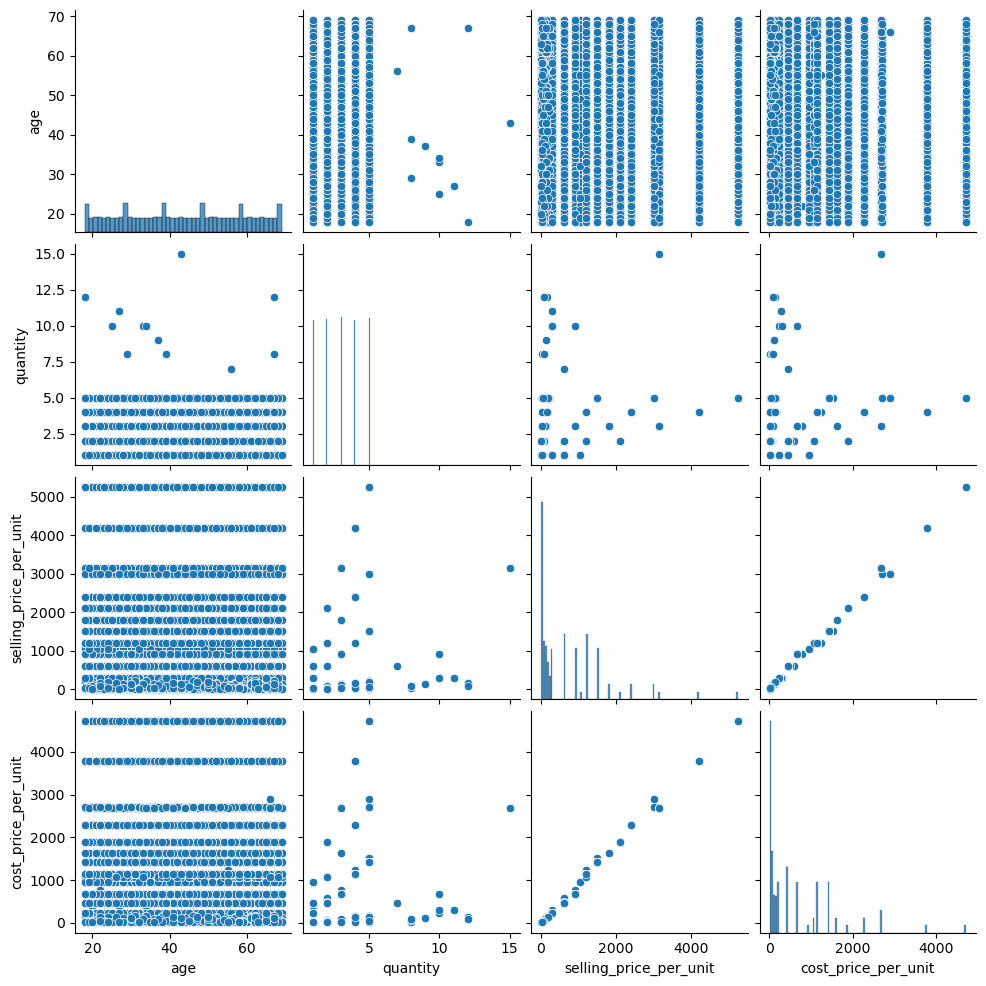

In [17]:
sns.pairplot(df)

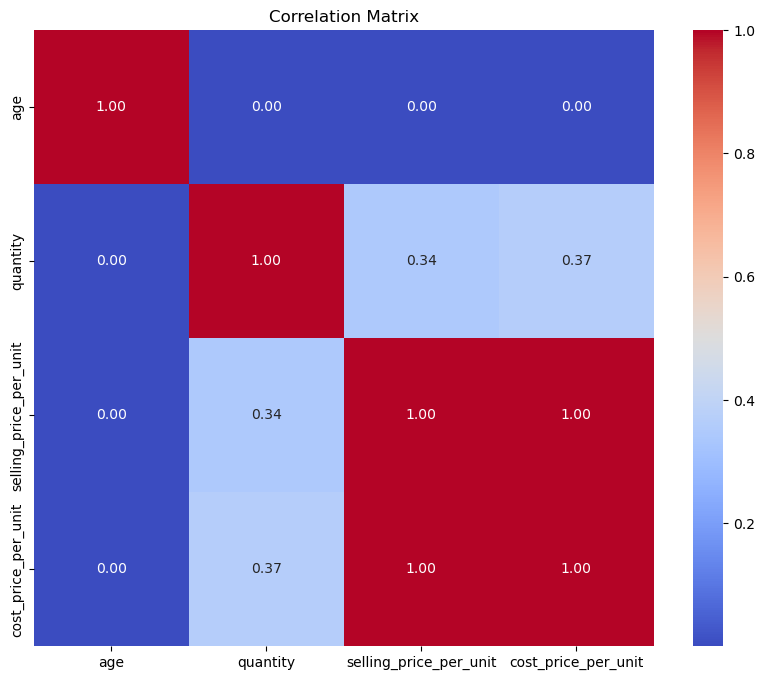

In [20]:
correlation_matrix = df[['age', 'quantity', 'selling_price_per_unit', 'cost_price_per_unit']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [21]:
df.isnull().sum()/df.shape[0]* 100

invoice_no                0.0
invoice_date              0.0
customer_id               0.0
gender                    0.0
age                       0.0
category                  0.0
quantity                  0.0
selling_price_per_unit    0.0
cost_price_per_unit       0.0
payment_method            0.0
region                    0.0
state                     0.0
shopping_mall             0.0
dtype: float64

In [22]:
numeric= ['int32', 'float64']
df_numeric = df.select_dtypes(include=numeric)
df_numeric

,selling_price_per_unit,cost_price_per_unit
0,1500.40,1425.3800
1,1800.51,1620.4590
2,300.08,295.0600
3,3000.85,2900.7650
4,60.60,45.4500
...,...,...
99452,58.65,43.9875
99453,10.46,7.3220
99454,10.46,7.3220
99455,4200.00,3780.0000


In [25]:
df_obj = df.select_dtypes(include='object')
df_obj

,invoice_no,invoice_date,customer_id,gender,category,payment_method,region,state,shopping_mall
0,I138884,10/30/2016 9:58,C241288,Female,Clothing,Credit Card,South,Kentucky,Kanyon
1,I317333,10/30/2016 9:58,C111565,Male,Shoes,Debit Card,South,Kentucky,Viaport Outlet
2,I127801,10/30/2016 9:58,C266599,Male,Clothing,Cash,West,California,Metrocity
3,I173702,10/30/2016 9:58,C988172,Female,Shoes,Credit Card,South,Florida,Metropol AVM
4,I337046,10/30/2016 9:59,C189076,Female,Books,Cash,South,Florida,Kanyon
...,...,...,...,...,...,...,...,...,...
99452,I219422,11/15/2016 12:43,C441542,Female,Souvenir,Credit Card,South,Alabama,Kanyon
99453,I325143,11/15/2016 12:43,C569580,Male,Food & Beverage,Cash,South,Alabama,Viaport Outlet
99454,I824010,11/15/2016 12:44,C103292,Male,Food & Beverage,Debit Card,South,Alabama,Metrocity
99455,I702964,11/15/2016 12:44,C800631,Male,Technology,Cash,South,Georgia,Istinye Park


In [26]:
df['invoice_time']=df['invoice_date'].apply(lambda x:x.split(' ')[1])

In [27]:
df['invoice_dates']=df['invoice_date'].apply(lambda x:x.split(' ')[0])

In [28]:
df.drop(columns=['invoice_date'], inplace=True)

In [29]:
df['Profit_margin'] = df['selling_price_per_unit'] - df['cost_price_per_unit']

In [30]:
df['Total_Cost'] = df['selling_price_per_unit']* df['quantity']

In [31]:
df['age'].unique()

array([28, 21, 20, 66, 53, 49, 32, 69, 60, 36, 29, 67, 25, 24, 65, 42, 46,
       23, 27, 52, 44, 51, 50, 68, 43, 59, 54, 48, 40, 41, 19, 18, 22, 61,
       45, 64, 33, 63, 34, 47, 38, 57, 30, 26, 62, 39, 55, 56, 35, 31, 37,
       58])

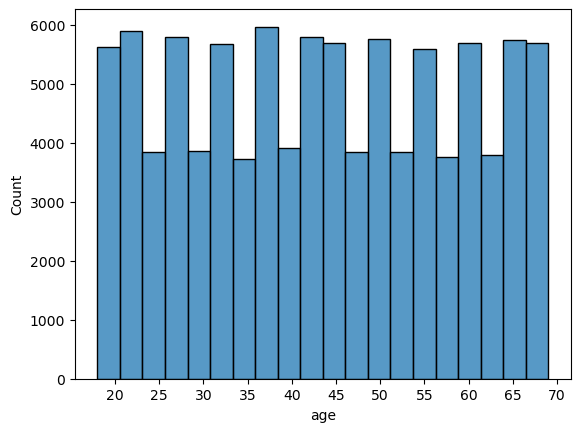

In [35]:
sns.histplot(df['age'], bins=20)
plt.xticks(ticks=[20,25,30,35,40,45,50,55,60,65,70]);

In [36]:
df["Age_category"] = pd.cut(df.age, [0, 25,40, 55, 71], labels=["youth", "adults", "older", "seniors"])

In [37]:
df['Age_category'].value_counts()

Age_category
adults     28931
older      28580
seniors    26587
youth      15359
Name: count, dtype: int64

<Axes: xlabel='Age_category', ylabel='count'>

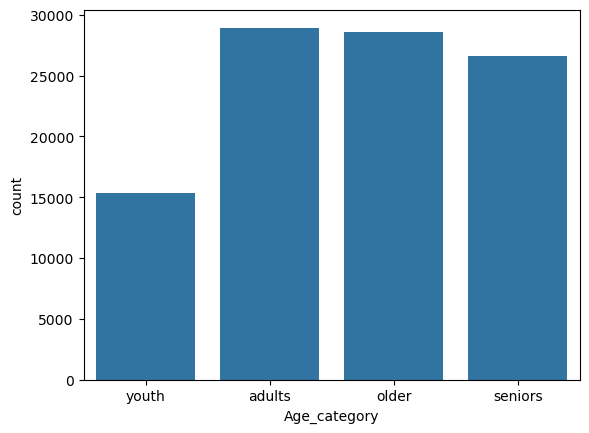

In [38]:
sns.countplot(x='Age_category', data=df)

In [39]:
df['gender'].value_counts()

gender
Female    59482
Male      39975
Name: count, dtype: int64

<Axes: xlabel='gender', ylabel='count'>

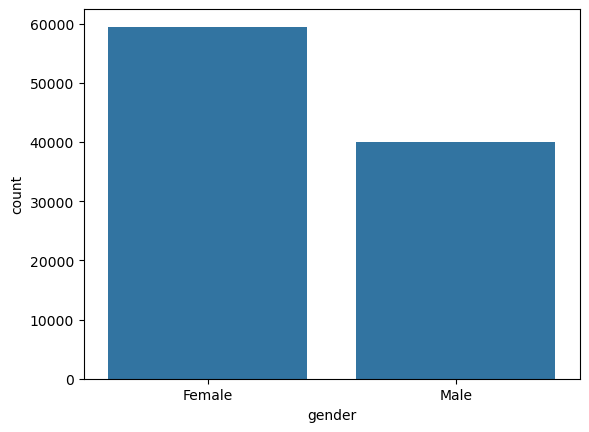

In [40]:
sns.countplot(x='gender',data= df)

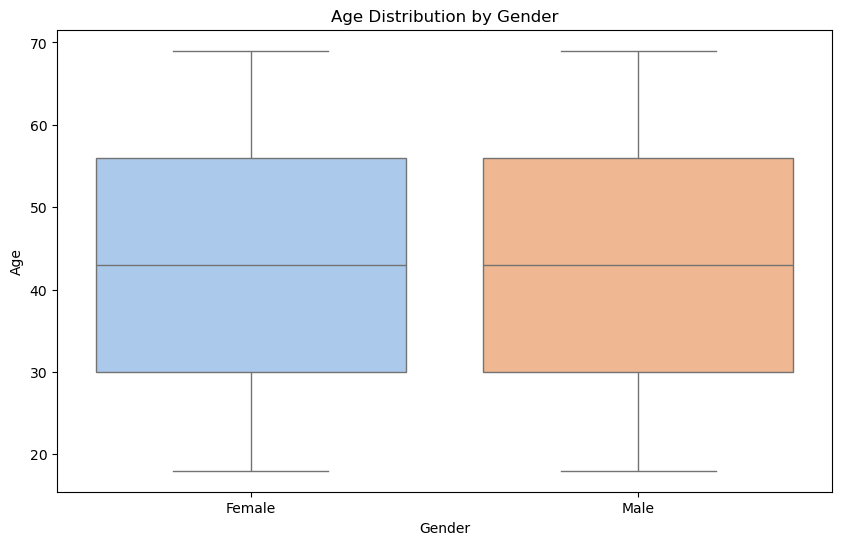

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(x='gender', y='age', data=df, palette='pastel')
plt.title('Age Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()

In [42]:
df['category'].value_counts()

category
Clothing           34487
Cosmetics          15097
Food & Beverage    14776
Toys               10087
Shoes              10034
Souvenir            4999
Technology          4996
Books               4981
Name: count, dtype: int64

In [43]:
df.groupby('gender')['category'].value_counts()

gender  category       
Female  Clothing           20652
        Cosmetics           9070
        Food & Beverage     8804
        Toys                6085
        Shoes               5967
        Souvenir            3017
        Technology          2981
        Books               2906
Male    Clothing           13835
        Cosmetics           6027
        Food & Beverage     5972
        Shoes               4067
        Toys                4002
        Books               2075
        Technology          2015
        Souvenir            1982
Name: count, dtype: int64

In [45]:
df.groupby('Age_category')['category'].value_counts()

Age_category  category       
youth         Clothing            5337
              Food & Beverage     2306
              Cosmetics           2276
              Toys                1583
              Shoes               1550
              Books                788
              Souvenir             768
              Technology           751
adults        Clothing           10016
              Cosmetics           4393
              Food & Beverage     4312
              Toys                2940
              Shoes               2886
              Technology          1498
              Souvenir            1475
              Books               1411
older         Clothing            9918
              Cosmetics           4370
              Food & Beverage     4223
              Shoes               2922
              Toys                2882
              Technology          1446
              Books               1430
              Souvenir            1389
seniors       Clothing            

<Axes: xlabel='category', ylabel='Total_Cost'>

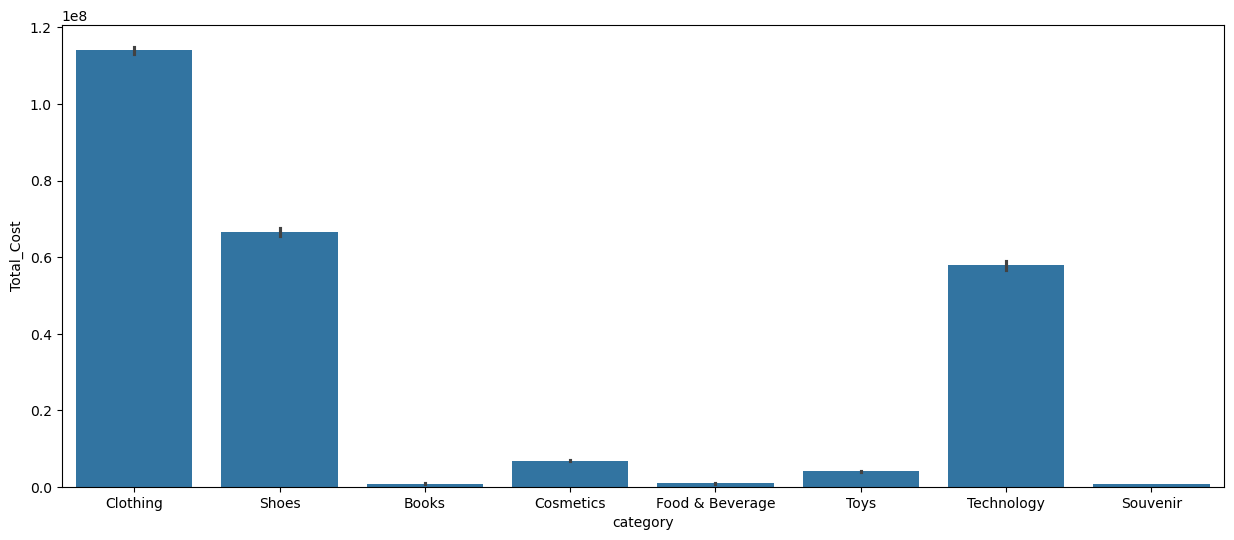

In [46]:
plt.figure(figsize=(15,6))
sns.barplot(x='category', y='Total_Cost', data=df, estimator=sum)

In [49]:
quantity_sold_per_category = df.groupby('category')['quantity'].sum().sort_values(ascending=False)

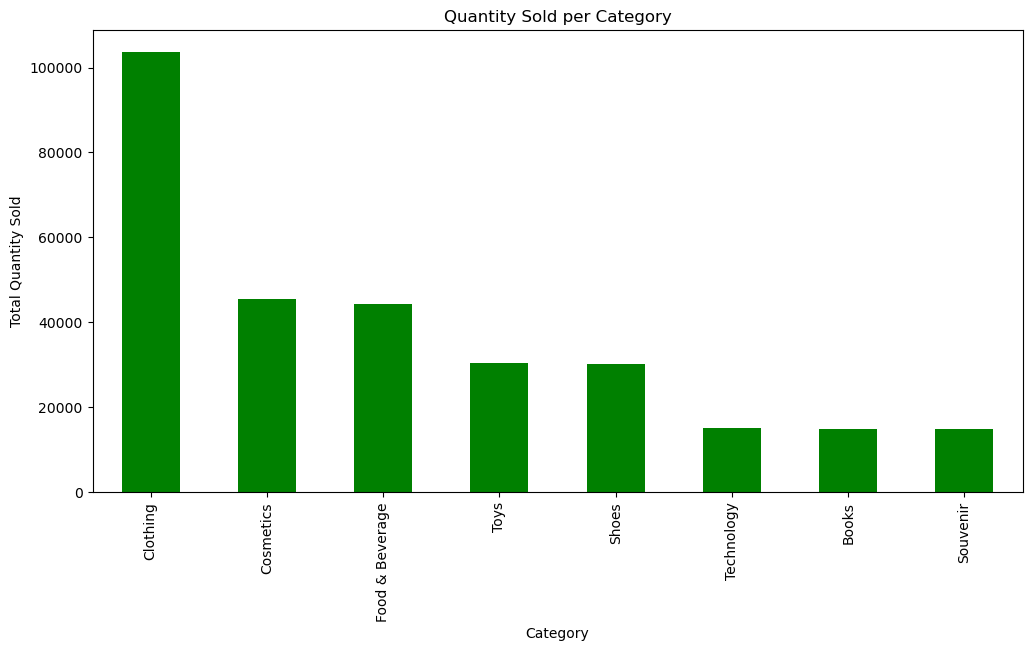

In [51]:
plt.figure(figsize=(12, 6))
quantity_sold_per_category.plot(kind= 'bar', color='green')
plt.title('Quantity Sold per Category')
plt.xlabel('Category')
plt.ylabel('Total Quantity Sold')
plt.show()

In [52]:
df.groupby('category')['selling_price_per_unit'].mean()

category
Books                45.568621
Clothing            901.084021
Cosmetics           122.448626
Food & Beverage      15.671948
Shoes              1807.388568
Souvenir             34.894345
Technology         3156.935548
Toys                107.733185
Name: selling_price_per_unit, dtype: float64

In [53]:
popular_category = df['category'].mode()[0]
popular_category

'Clothing'

<Axes: xlabel='category', ylabel='count'>

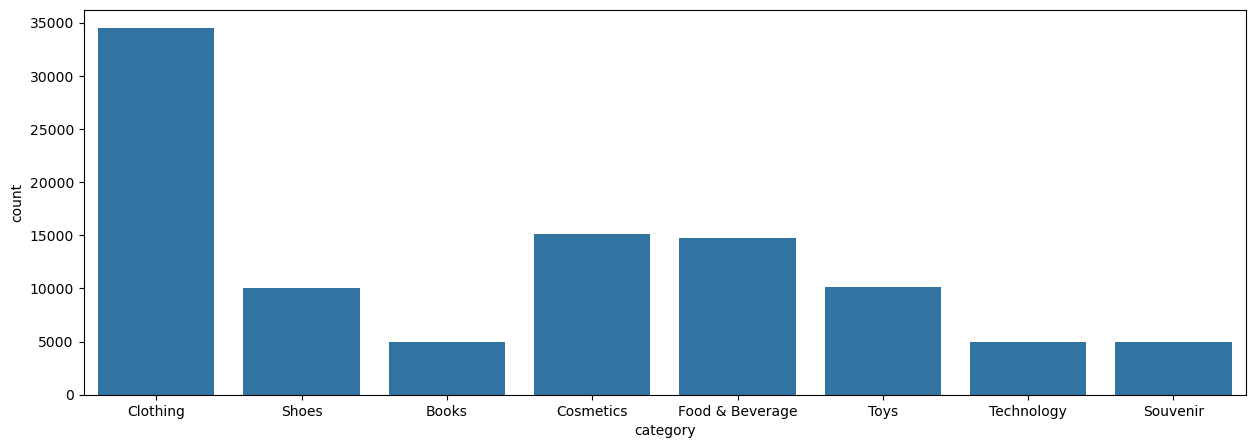

In [54]:
plt.figure(figsize=(15,5))
sns.countplot(x='category', data=df)

In [55]:
state_avg_selling_price = df.groupby('state')['selling_price_per_unit'].mean().sort_values(ascending=False)

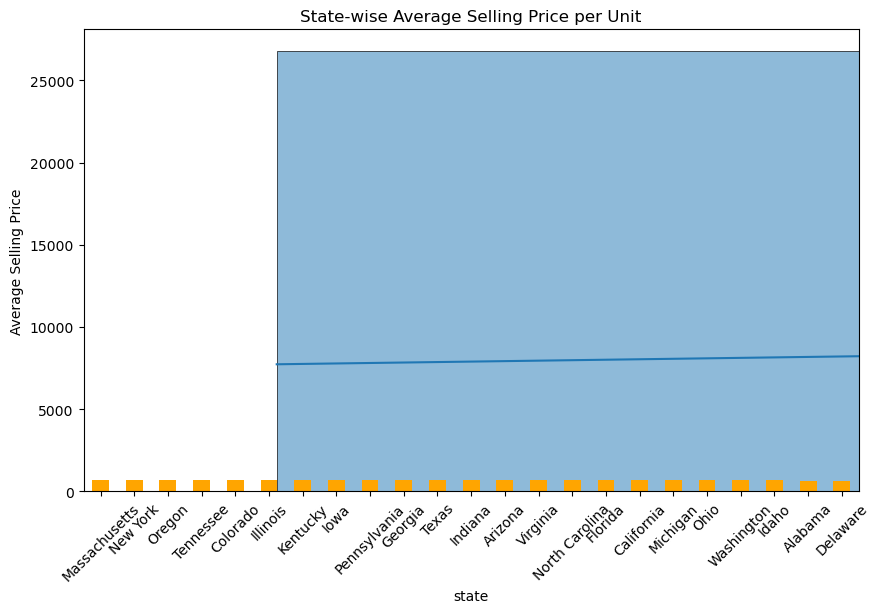

In [59]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price_per_unit'], kde=True)
state_avg_selling_price.plot(kind='bar', color='orange')
plt.title('State-wise Average Selling Price per Unit')
plt.xticks(rotation=45)
plt.ylabel('Average Selling Price')
plt.show()